Goal: Use scikit-learn's CountVectorizer and TfidfVectorizer to turn SMS text into bag-of-words features. Train LogisticRegression on spam/ham classification. Compare how params like max_features and ngram_range affect accuracy.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,  TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report
import string


[nltk_data] Downloading package stopwords to /home/vinny/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# Load SMS Spam (direct GitHub raw URL - no Kaggle needed)
url = 'https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv'
email_data = pd.read_csv(url, encoding='latin-1')

In [21]:
email_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<Axes: xlabel='count', ylabel='v1'>

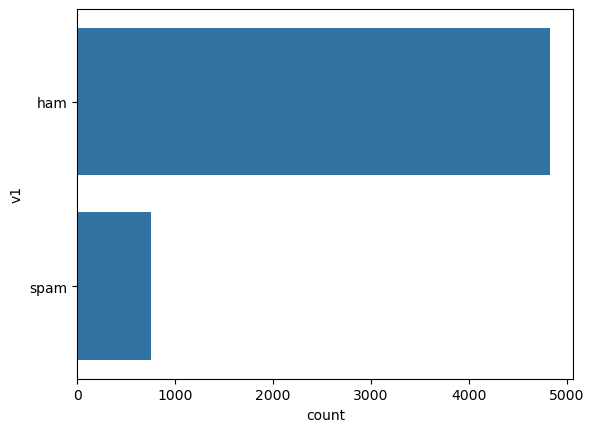

In [22]:
sns.countplot(email_data['v1'], label = "Count of the Labels")

In [23]:
#dropping the columnns with NaNs
email_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis  = 1, inplace = True)

#renaming the remaining columns
email_data = email_data.rename(columns = {"v1": "label", "v2": "text"})

email_data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
def clean_review(review):
    remove_punctuation = [word for word in review if word not in string.punctuation]
    join_characters = ''.join(remove_punctuation)
    remove_stopwords = [word for word in join_characters.split() if word.lower() not in stopwords.words('english')]
    cleaned_review = remove_stopwords
    return cleaned_review

In [ ]:
# Using the `CountVectorizer`
count_vectorizer = CountVectorizer(analyzer = clean_review)

email_countvec = count_vectorizer.fit_transform(email_data['text'])

In [26]:
# Encoding the Dependent Variable `label`
le = LabelEncoder()
email_data['label'] = le.fit_transform(email_data['label'])

In [27]:
# Splitting the Data into Training and Testing
X = email_countvec
y = email_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [28]:
# Classification using `LogisticRegression`
classifier = LogisticRegression() 
classifier.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Evaluating the CountVectorizer Model
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1204
           1       1.00      0.79      0.88       189

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393



In [31]:
# Using TF-IDF
tfid = TfidfVectorizer(analyzer = clean_review)
tfidvec = tfid.fit_transform(email_data['text'])

In [32]:
# Splitting the Data into Training and Testing
X2 = tfidvec
y2 = email_data['label']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.25)

In [34]:
# Classification using `LogisticRegression`
classifier2 = LogisticRegression() 
classifier2.fit(X_train2, y_train2)

LogisticRegression()

In [35]:
# Evaluating the TF-IDF Model
y_pred2 = classifier2.predict(X_test2)
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1221
           1       0.99      0.62      0.76       172

    accuracy                           0.95      1393
   macro avg       0.97      0.81      0.87      1393
weighted avg       0.95      0.95      0.95      1393



While comparing BoW and TF-IDF based on Classification report it can be seen
1. For Majority Class TF-IDF has lower precision, but better F1-Scor.e
2. For Minority ClasF Recall and F1-Score is better in B in comparison to TF-IDF.W.
3. Overall Accuracy is better in BoW. In this specific dataset, BoW is clearly the better model. 